In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import skimage
import cv2
from scipy.fftpack import dct

### **Problem 3**

In [ ]:
# Function to Compute 1D DCT

def DCT_1D(x):

    N = len(x)

    DCT_MAT = np.array([ [ 2 * math.cos((2*n+1)*math.pi*k/(2*N)) for n in range(N) ] for k in range(N) ])

    X = np.matmul(DCT_MAT,x)

    return X

In [ ]:
# Function to Create patches

def create_patches(I, patch_size):
    M,N = I.shape

    patches = []

    for i in np.arange(0,M,patch_size[0]):
        for j in np.arange(0,N,patch_size[1]):
            patches.append(I[i:i+patch_size[0],j:j+patch_size[1]])
        patches.append(I[i:i+patch_size[0],j:j+patch_size[1]])

    return patches

In [ ]:
# Function to Stitch Patches

def stitch_patches(patches, patch_size, image_size):

    no_horizontal_patches = int(image_size[1]/patch_size[1])

    row_patches = [np.hstack(patches[i:i+no_horizontal_patches]) for i in range(0,len(patches),no_horizontal_patches+1) ]

    reconstructed_image = np.vstack(row_patches)

    return reconstructed_image

In [ ]:
# Function to Create Block 2D DCT

def BLOCK_DCT_2D(I, patch_size):

    image_patches = create_patches(I, patch_size = patch_size)
    DCT_patches = []

    for patch in image_patches:

        row_DCT = DCT_1D(np.transpose(np.array(patch)))
        row_column_DCT = DCT_1D(np.transpose(row_DCT))

        DCT_patches.append(row_column_DCT)

    DCT_image = stitch_patches(DCT_patches, patch_size, image_size=I.shape)

    return DCT_image

In [ ]:
peppers = skimage.color.rgb2gray(skimage.io.imread('pepper.png'))

(-0.5, 511.5, 511.5, -0.5)

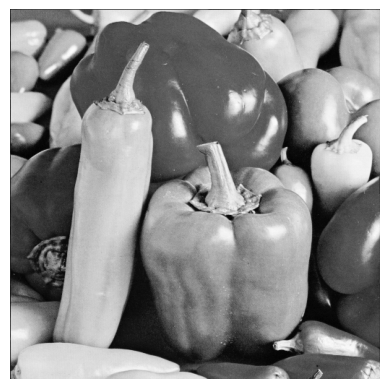

In [ ]:
plt.imshow(peppers, cmap = 'gray')
plt.axis('off')

Text(0, 0.5, '$k_1$')

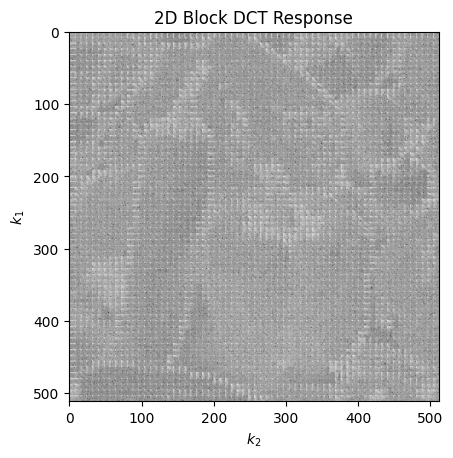

In [ ]:
plt.imshow(np.log(np.abs(BLOCK_DCT_2D(peppers ,patch_size = (8,8)))), cmap = 'gray')
plt.title('2D Block DCT Response')
plt.xlabel('$k_2$')
plt.ylabel('$k_1$')